# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
Q1 = customers.quantile(0.25)
Q3 = customers.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Channel                 1.00
Region                  1.00
Fresh               13806.00
Milk                 5657.25
Grocery              8502.75
Frozen               2812.00
Detergents_Paper     3665.25
Delicassen           1412.00
dtype: float64


In [6]:
num_outliers = ((customers < (Q1 - 1.5 * IQR)) | (customers > (Q3 + 1.5 * IQR))).sum().sum()
num_outliers

172

In [7]:
cols = customers.columns
cols

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [8]:
cols

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [9]:
customers.Region.unique()

array([3, 1, 2])

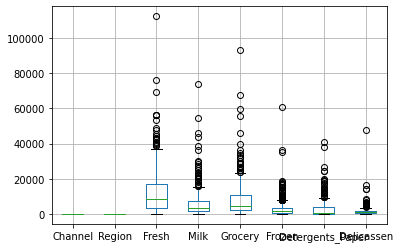

In [10]:
customers.boxplot(column=list(cols))

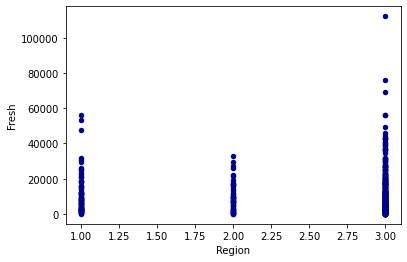

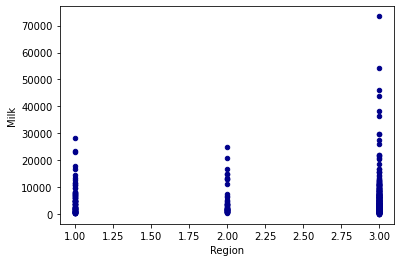

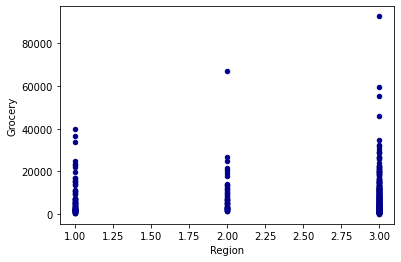

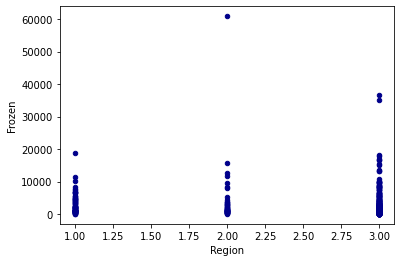

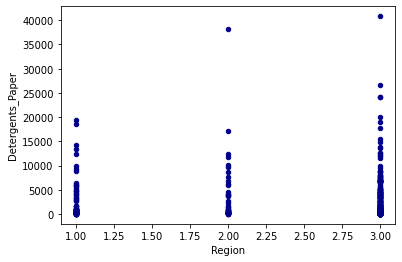

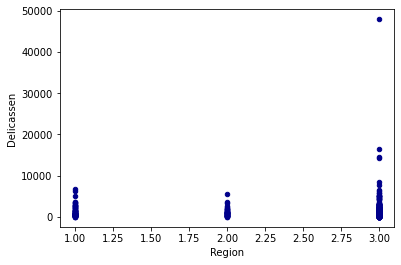

In [11]:

for i in range(2,len(customers.columns)):
    ax1 = customers.plot.scatter(x='Region',
                          y=i,
                          c='DarkBlue')

In [12]:
# Your observations here
print('Wathching the plotted charts we should drop detected outliers')

Wathching the plotted charts we should drop detected outliers


# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [13]:
# Your code here


# delete all rows with column 'Age' has value 30 to 40 
# indexNames = dfObj[ (dfObj['Age'] >= 30) & (dfObj['Age'] <= 40) ].index
# dfObj.drop(indexNames , inplace=True)

# Removing outliers:
customers_outliers = customers[((customers< (Q1 - 1.5 * IQR)) |(customers > (Q3 + 1.5 * IQR))).any(axis=1)].index
customers.drop(customers_outliers,inplace=True)
customers.shape

(332, 8)

In [14]:
len(customers)

332

In [15]:
# Your comment here
'''Outliners could modify our future conclusiones, so that we have dropped from out DataFrame'''

'Outliners could modify our future conclusiones, so that we have dropped from out DataFrame'

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [16]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler()
customers_scale = scaler.fit_transform(customers)

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [17]:
# Your code here:
from sklearn.cluster import KMeans
kmeans = KMeans().fit(customers_scale)
customers['labels'] = kmeans.labels_

In [18]:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
3,1,3,13265,1196,4221,6404,507,1788,0
5,2,3,9413,8259,5126,666,1795,1451,1
6,2,3,12126,3199,6975,480,3140,545,1


Count the values in `labels`.

In [19]:
# Your code here:
customers['labels'].value_counts(normalize=False)

4    104
2     46
6     41
0     37
7     33
1     32
5     25
3     14
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [20]:
# Your code here
from sklearn.cluster import DBSCAN
model_dbscan = DBSCAN(eps=0.5).fit(customers_scale)
customers['labels_DBSCAN'] = model_dbscan.labels_
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,1,-1
1,2,3,7057,9810,9568,1762,3293,1776,1,-1
3,1,3,13265,1196,4221,6404,507,1788,0,-1
5,2,3,9413,8259,5126,666,1795,1451,1,-1
6,2,3,12126,3199,6975,480,3140,545,1,-1


Count the values in `labels_DBSCAN`.

In [21]:
# Your code here
customers['labels_DBSCAN'].value_counts()

-1    308
 0     24
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

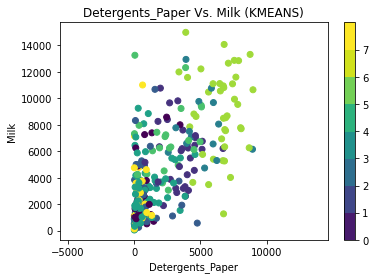

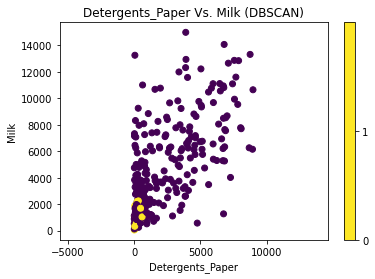

In [22]:
# Your code here:
labels = customers['labels']
labels_DBSCAN = customers['labels_DBSCAN']

plt.scatter(customers['Detergents_Paper'], customers['Milk'], c=labels)
plt.gca().set_aspect('equal', 'datalim')
plt.xlabel('Detergents_Paper')
plt.ylabel('Milk')
plt.colorbar(boundaries=np.arange(len(np.unique(labels))+1)).set_ticks(np.arange(len(np.unique(labels))))
plt.title('Detergents_Paper Vs. Milk (KMEANS)')
plt.show()
plt.scatter(customers['Detergents_Paper'], customers['Milk'], c=labels_DBSCAN)
plt.gca().set_aspect('equal', 'datalim')
plt.xlabel('Detergents_Paper')
plt.ylabel('Milk')
plt.colorbar(boundaries=np.arange(len(np.unique(labels_DBSCAN))+1)).set_ticks(np.arange(len(np.unique(labels_DBSCAN))))
plt.title('Detergents_Paper Vs. Milk (DBSCAN)')
plt.show()

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

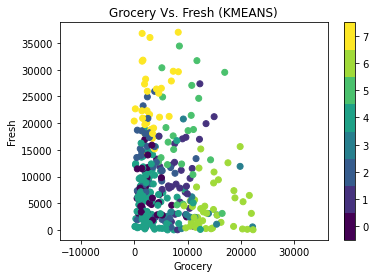

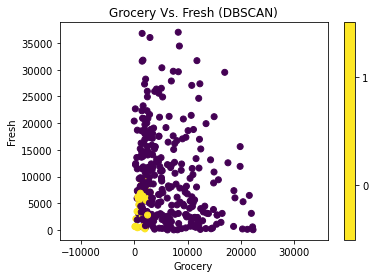

In [23]:
# Your code here:
plt.scatter(customers['Grocery'], customers['Fresh'], c=labels)
plt.gca().set_aspect('equal', 'datalim')
plt.xlabel('Grocery')
plt.ylabel('Fresh')
plt.colorbar(boundaries=np.arange(len(np.unique(labels))+1)-0.5).set_ticks(np.arange(len(np.unique(labels))))
plt.title('Grocery Vs. Fresh (KMEANS)')
plt.show()
plt.scatter(customers['Grocery'], customers['Fresh'], c=labels_DBSCAN)
plt.gca().set_aspect('equal', 'datalim')
plt.xlabel('Grocery')
plt.ylabel('Fresh')
plt.colorbar(boundaries=np.arange(len(np.unique(labels_DBSCAN))+1)-0.5).set_ticks(np.arange(len(np.unique(labels_DBSCAN))))
plt.title('Grocery Vs. Fresh (DBSCAN)')
plt.show()

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

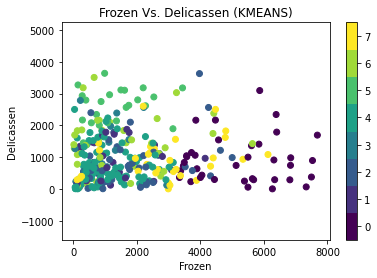

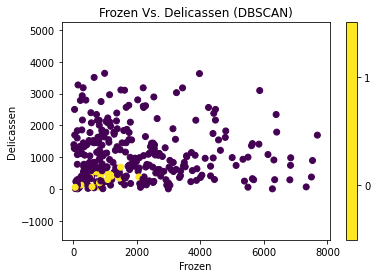

In [24]:
# Your code here:
plt.scatter(customers['Frozen'], customers['Delicassen'], c=labels)
plt.gca().set_aspect('equal', 'datalim')
plt.xlabel('Frozen')
plt.ylabel('Delicassen')
plt.colorbar(boundaries=np.arange(len(np.unique(labels))+1)-0.5).set_ticks(np.arange(len(np.unique(labels))))
plt.title('Frozen Vs. Delicassen (KMEANS)')
plt.show()
plt.scatter(customers['Frozen'], customers['Delicassen'], c=labels_DBSCAN)
plt.gca().set_aspect('equal', 'datalim')
plt.xlabel('Frozen')
plt.ylabel('Delicassen')
plt.colorbar(boundaries=np.arange(len(np.unique(labels_DBSCAN))+1)-0.5).set_ticks(np.arange(len(np.unique(labels_DBSCAN))))
plt.title('Frozen Vs. Delicassen (DBSCAN)')
plt.show()

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [25]:
# Your code here:
customers.groupby(['labels', 'labels_DBSCAN']).mean()

Channel    Region         Fresh         Milk  \
labels labels_DBSCAN                                                  
0      -1             1.027027  2.486486   7065.621622  2520.270270   
1      -1             2.000000  2.906250  10397.656250  5588.625000   
2      -1             1.000000  1.152174  10299.956522  2442.152174   
3      -1             1.714286  1.142857   4684.071429  7774.357143   
4      -1             1.000000  2.937500   6493.800000  2794.762500   
        0             1.000000  3.000000   4344.625000  1124.333333   
5      -1             1.520000  2.840000  17681.520000  6718.960000   
6      -1             1.951220  2.902439   4335.414634  9017.000000   
7      -1             1.000000  2.787879  24019.484848  2467.212121   

                           Grocery       Frozen  Detergents_Paper   Delicassen  
labels labels_DBSCAN                                                            
0      -1              2927.351351  5239.000000        619.351351   904.486486  
1      -1              8640.687500  1241.281250       3437.687500   835.343750  
2      -1              3091.456522  1808.130435        737.978261   853.847826  
3      -1             12210.357143  1104.714286       5112.000000  1272.857143  
4      -1              3531.112500  1099.787500        839.175000   811.000000  
        0              1411.875000   846.875000        230.666667   329.125000  
5      -1              9088.880000  1310.280000       2357.320000  2564.080000  
6      -1             14650.146341  1342.146341       6502.756098  1275.512195  
7      -1              3287.454545  2734.393939        415.969697   940.636364

Which algorithm appears to perform better?

In [26]:
# Your observations here
'''DBSCAN is preforming better than KMEANS'''

'DBSCAN is preforming better than KMEANS'

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

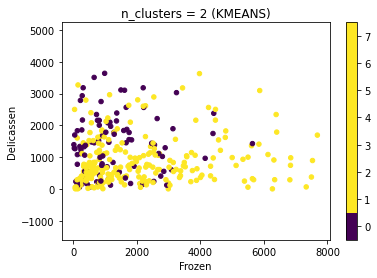

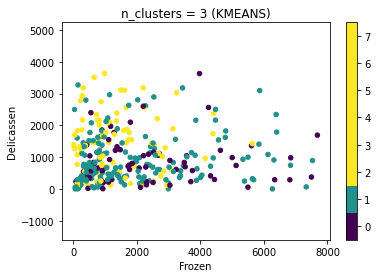

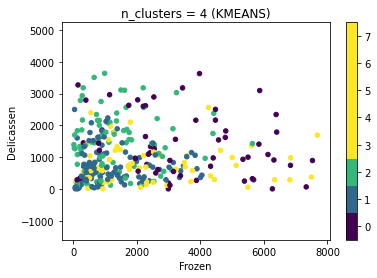

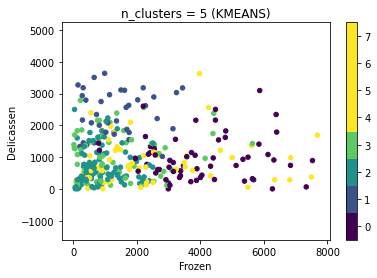

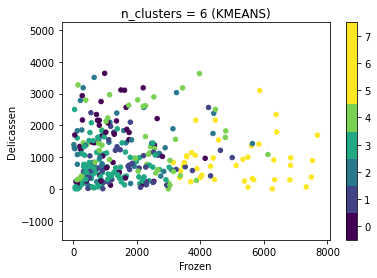

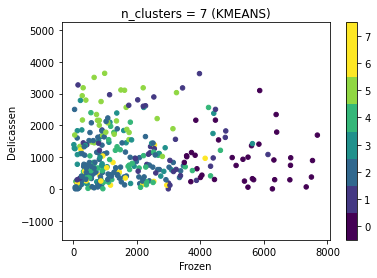

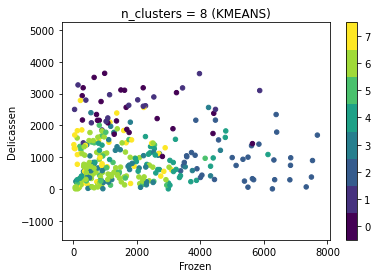

In [27]:
# Your code here
for i in range(2,9):
    model = KMeans(n_clusters=i, random_state=42).fit(customers_scale)

    plt.scatter(customers['Frozen'], customers['Delicassen'], c=model.labels_, s=20)
    plt.gca().set_aspect('equal', 'datalim')
    plt.xlabel('Frozen')
    plt.ylabel('Delicassen')
    plt.colorbar(boundaries=np.arange(len(np.unique(labels))+1)-0.5).set_ticks(np.arange(len(np.unique(labels))))
    plt.title(f'n_clusters = {i} (KMEANS)')
    plt.show()

In [28]:
# Your comment here 

# Disadvantage Of K-MEANS:

# K-Means forms spherical clusters only. This algorithm fails when data is not spherical ( i.e. same variance in all directions).

# K-Means algorithm is sensitive towards outlier. Outliers can skew the clusters in K-Means in very large extent.

# K-Means algorithm requires one to specify the number of clusters a priory etc.
# Basically, DBSCAN algorithm overcomes all the above-mentioned drawbacks of K-Means algorithm. DBSCAN algorithm identifies the dense region by grouping together data points that are closed to each other based on distance measurement.

# Python implementation of above algorithm without using the sklearn library can be found here dbscan_in_python.

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

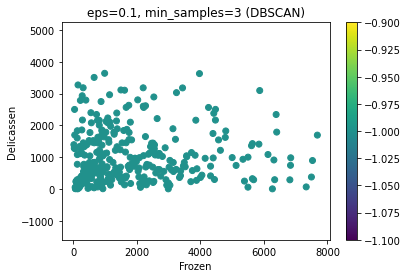

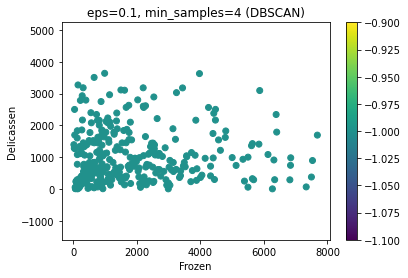

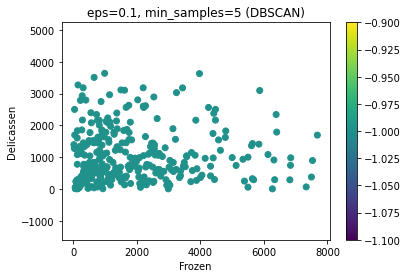

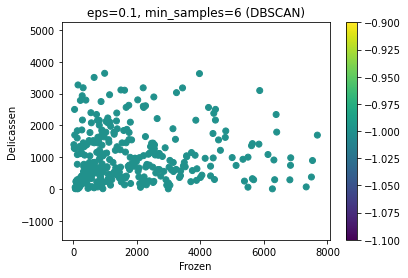

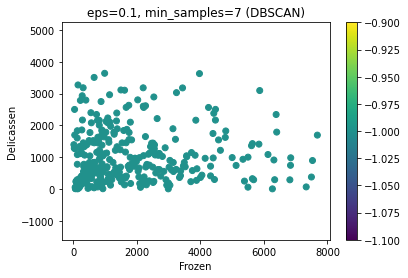

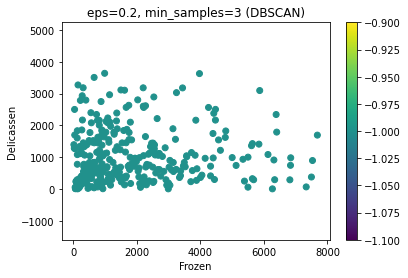

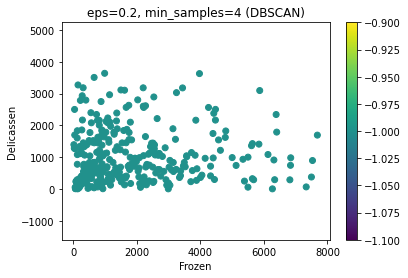

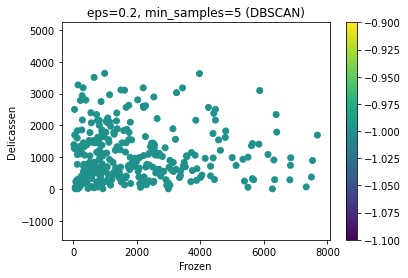

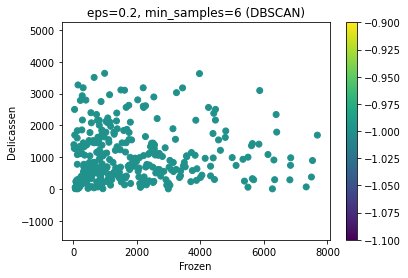

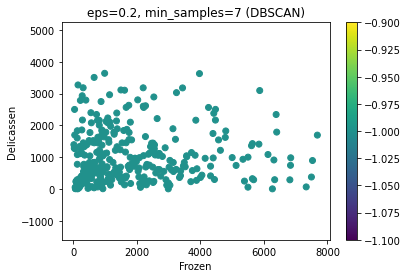

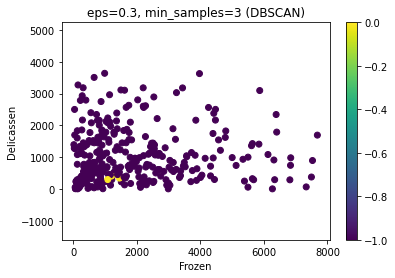

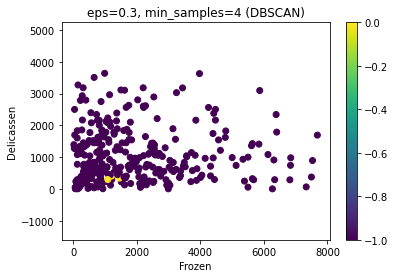

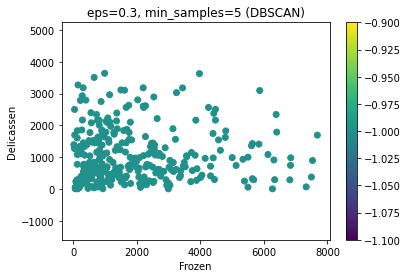

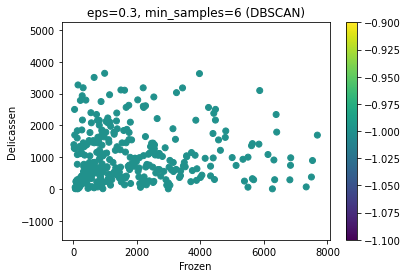

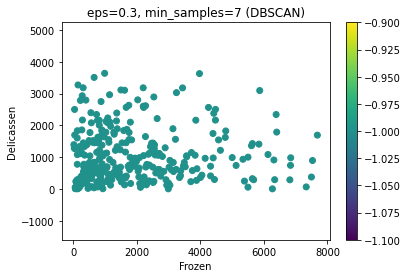

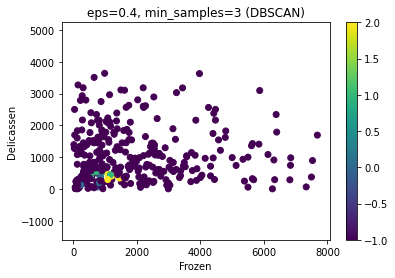

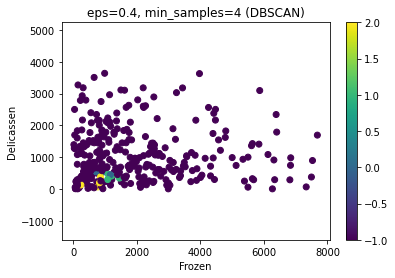

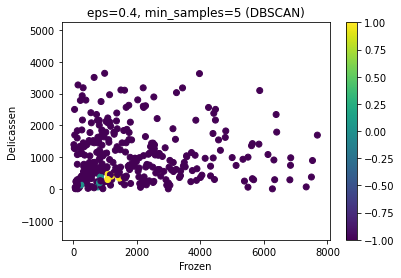

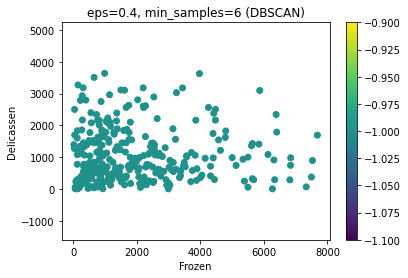

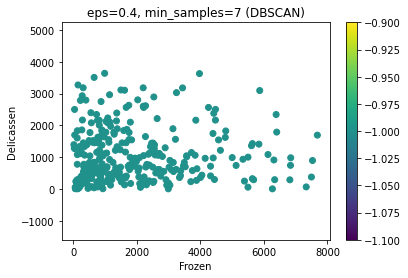

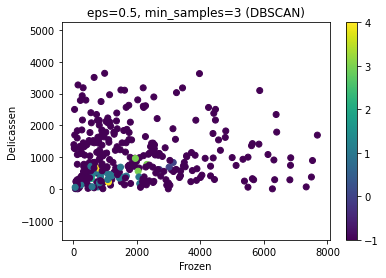

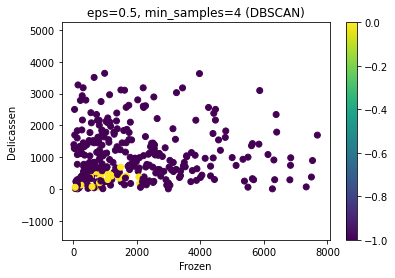

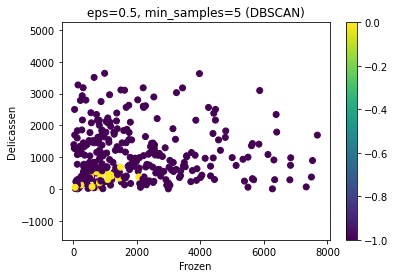

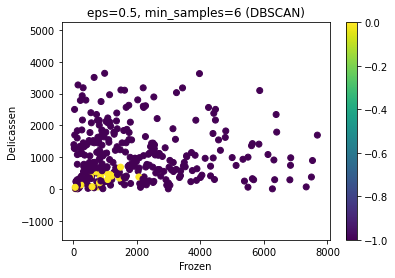

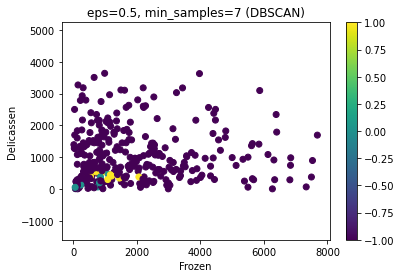

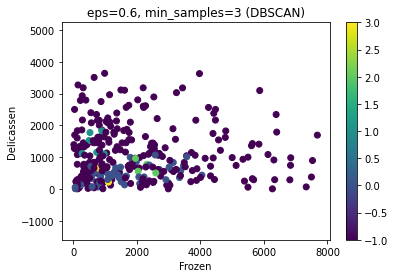

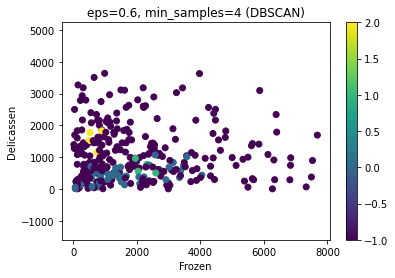

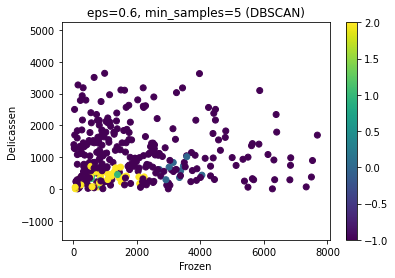

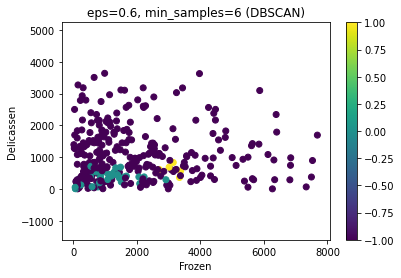

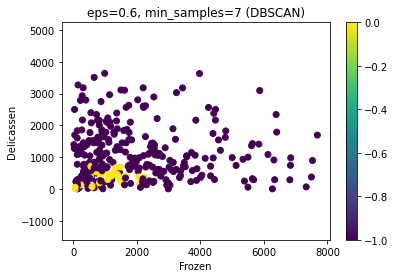

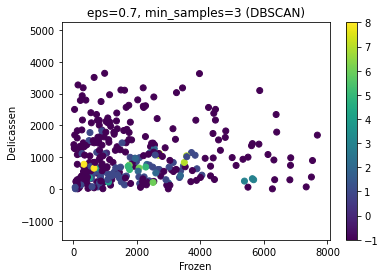

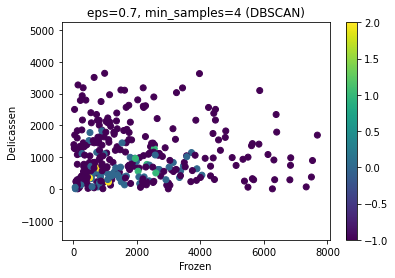

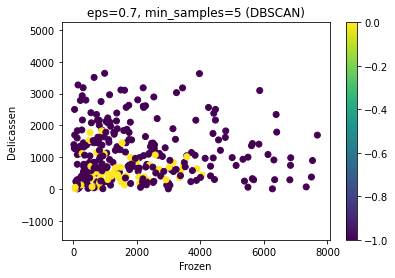

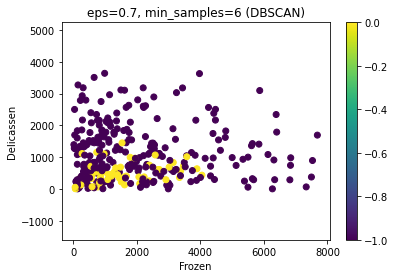

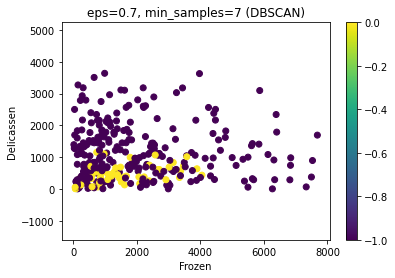

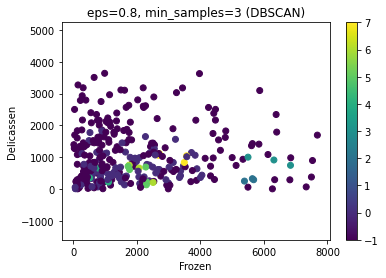

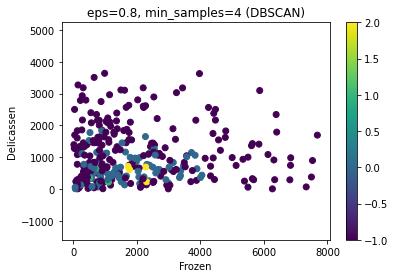

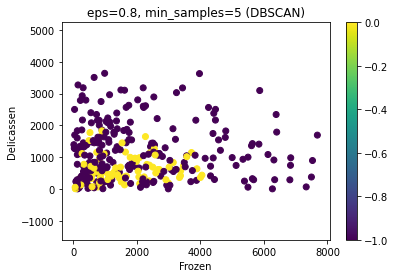

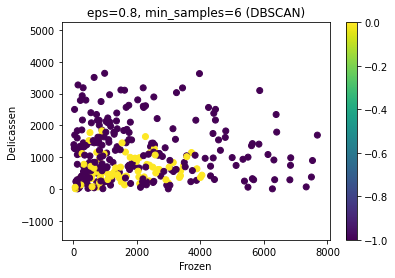

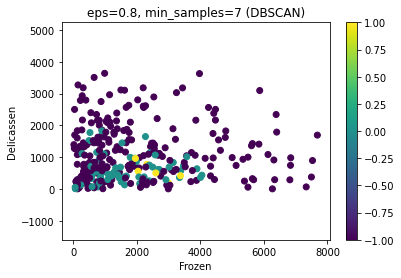

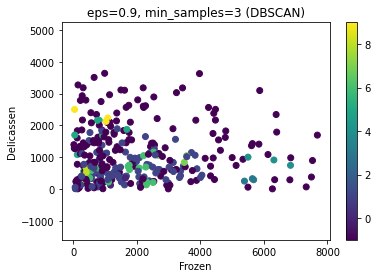

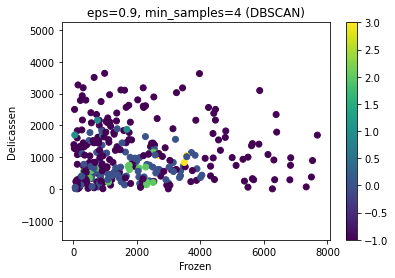

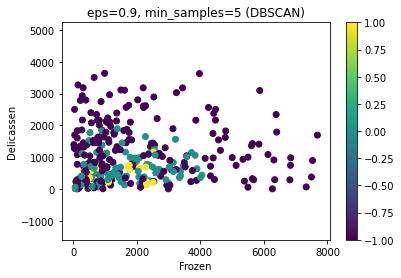

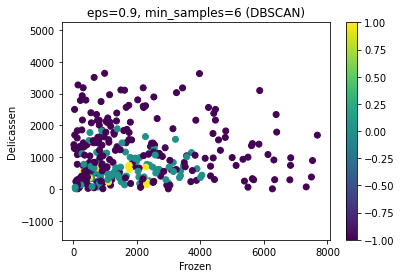

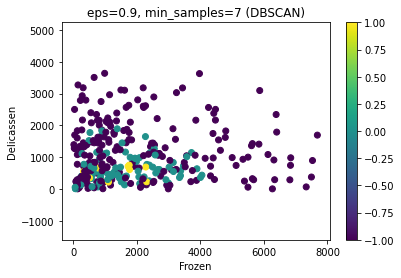

In [29]:
# Your code here
eps = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
min_samples = [3, 4, 5, 6, 7]
for i in eps:
    for j in min_samples:
        model_dbscan = DBSCAN(eps=i, min_samples=j).fit(customers_scale)
        plt.scatter(customers['Frozen'], customers['Delicassen'], c=model_dbscan.labels_)
        plt.gca().set_aspect('equal', 'datalim')
        plt.xlabel('Frozen')
        plt.ylabel('Delicassen')
        plt.colorbar()
        plt.title(f'eps={i}, min_samples={j} (DBSCAN)')
        plt.show()



In [30]:
# Your comment here 

# Disadvantage Of K-MEANS:

# K-Means forms spherical clusters only. This algorithm fails when data is not spherical ( i.e. same variance in all directions).

# K-Means algorithm is sensitive towards outlier. Outliers can skew the clusters in K-Means in very large extent.

# K-Means algorithm requires one to specify the number of clusters a priory etc.
# Basically, DBSCAN algorithm overcomes all the above-mentioned drawbacks of K-Means algorithm. DBSCAN algorithm identifies the dense region by grouping together data points that are closed to each other based on distance measurement.

# Python implementation of above algorithm without using the sklearn library can be found here dbscan_in_python.